<a href="https://colab.research.google.com/github/ridhampatel14/ML_projects/blob/main/k_means_clustering_and_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**k-means clustering**

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
df=pd.read_csv("clustering_data.csv")

In [ ]:
df.head()

,X,Y,Z,Cluster label
0,1.014886,0.750362,1.156124,1.0
1,-0.197795,0.362302,0.884961,1.0
2,0.628812,2.889340,0.019449,1.0
3,0.642886,2.423315,0.329615,1.0
4,2.197576,-0.903305,1.581067,1.0


In [ ]:
df1=df[["X","Y","Z"]]

In [ ]:
df1.head()

,X,Y,Z
0,1.014886,0.750362,1.156124
1,-0.197795,0.362302,0.884961
2,0.628812,2.889340,0.019449
3,0.642886,2.423315,0.329615
4,2.197576,-0.903305,1.581067


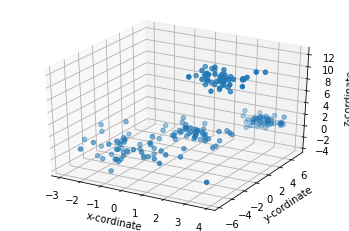

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['X'],df['Y'],df['Z'])
ax.set_xlabel("x-cordinate")
ax.set_ylabel("y-cordinate")
ax.set_zlabel("z-cordinate")

plt.show()

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['X','Y','Z']])
y_predicted

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
df1["predicted_values"]=y_predicted
df1.head()

,X,Y,Z,predicted_values
0,1.014886,0.750362,1.156124,1
1,-0.197795,0.362302,0.884961,1
2,0.628812,2.889340,0.019449,0
3,0.642886,2.423315,0.329615,1
4,2.197576,-0.903305,1.581067,1


In [ ]:
km.cluster_centers_

array([[ 2.85027195,  5.81809934,  1.05499459],
       [ 0.09186788, -1.08780851,  0.06394536],
       [ 1.98095455,  1.99272399,  9.98536011]])

In [ ]:
df1['predicted_values'].value_counts()

1    96
0    54
2    50
Name: predicted_values, dtype: int64

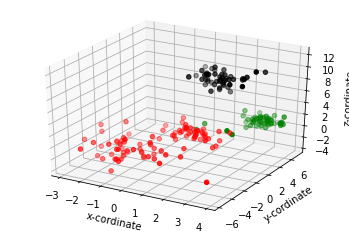

In [ ]:
df2 = df1[df1.predicted_values==0]
df3 = df1[df1.predicted_values==1]
df4 = df1[df1.predicted_values==2]
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df2['X'],df2['Y'],df2['Z'],c='green')
ax.scatter(df3['X'],df3['Y'],df3['Z'],c='red')
ax.scatter(df4['X'],df4['Y'],df4['Z'],c='black')
ax.set_xlabel("x-cordinate")
ax.set_ylabel("y-cordinate")
ax.set_zlabel("z-cordinate")

plt.show()

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[['X','Y','Z']])
    sse.append(km.inertia_)

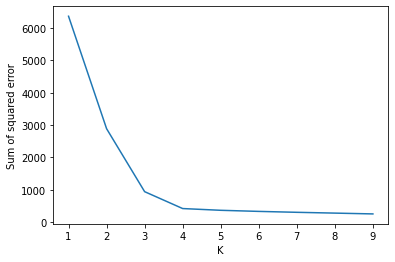

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

here using elbow method we can say that k=4 will be best for our model.

In [ ]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['X','Y','Z']])
y_predicted

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
df1["predicted_values_after_elbowmethod"]=y_predicted
df1.head()

,X,Y,Z,predicted_values,predicted_values_after_elbowmethod
0,1.014886,0.750362,1.156124,1,3
1,-0.197795,0.362302,0.884961,1,3
2,0.628812,2.889340,0.019449,0,3
3,0.642886,2.423315,0.329615,1,3
4,2.197576,-0.903305,1.581067,1,3


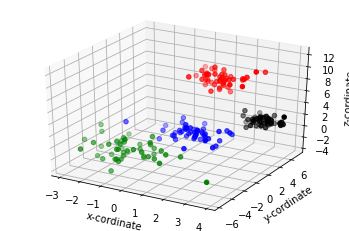

In [ ]:
df5 = df1[df1.predicted_values_after_elbowmethod==0]
df6 = df1[df1.predicted_values_after_elbowmethod==1]
df7 = df1[df1.predicted_values_after_elbowmethod==2]
df8 = df1[df1.predicted_values_after_elbowmethod==3]
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df5['X'],df5['Y'],df5['Z'],c='green')
ax.scatter(df6['X'],df6['Y'],df6['Z'],c='red')
ax.scatter(df7['X'],df7['Y'],df7['Z'],c='black')
ax.scatter(df8['X'],df8['Y'],df8['Z'],c='blue')
ax.set_xlabel("x-cordinate")
ax.set_ylabel("y-cordinate")
ax.set_zlabel("z-cordinate")

plt.show()

E-step: In this step, the available data is used to estimate (guess) the values of the missing variables

M-step: Based on the estimated values generated in the E-step, the complete data is used to update the parameters

EM-algorithm is used to complete the incomplete data but here the data is completed so we will directly jump on GMM-algorithm for clustering and compare it with k-means algoritham.


In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
new_df=df1[['X','Y','Z']]
new_df.head()

,X,Y,Z
0,1.014886,0.750362,1.156124
1,-0.197795,0.362302,0.884961
2,0.628812,2.889340,0.019449
3,0.642886,2.423315,0.329615
4,2.197576,-0.903305,1.581067


In [ ]:
gmm = GaussianMixture(n_components=4)
gmm.fit(new_df)
label=gmm.predict(new_df)
label

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
new_df['predicted']=label
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,X,Y,Z,predicted
0,1.014886,0.750362,1.156124,3
1,-0.197795,0.362302,0.884961,3
2,0.628812,2.889340,0.019449,3
3,0.642886,2.423315,0.329615,3
4,2.197576,-0.903305,1.581067,3


In [ ]:
#value counts for already given output
df['Cluster label'].value_counts()

4.0    50
3.0    50
2.0    50
1.0    50
Name: Cluster label, dtype: int64

In [ ]:
#value counts obtained using k-means algorithm
df1['predicted_values_after_elbowmethod'].value_counts()

3    52
2    50
1    50
0    48
Name: predicted_values_after_elbowmethod, dtype: int64

In [ ]:
##value counts obtained using GMM algorithm
new_df['predicted'].value_counts()

3    50
2    50
1    50
0    50
Name: predicted, dtype: int64

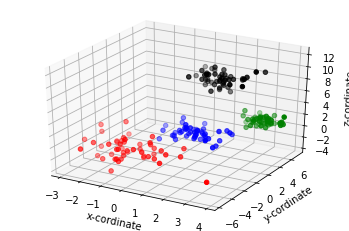

In [ ]:
df9 = new_df[new_df.predicted==0]
df10= new_df[new_df.predicted==1]
df11= new_df[new_df.predicted==2]
df12= new_df[new_df.predicted==3]
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df9['X'],df9['Y'],df9['Z'],c='green')
ax.scatter(df10['X'],df10['Y'],df10['Z'],c='red')
ax.scatter(df11['X'],df11['Y'],df11['Z'],c='black')
ax.scatter(df12['X'],df12['Y'],df12['Z'],c='blue')
ax.set_xlabel("x-cordinate")
ax.set_ylabel("y-cordinate")
ax.set_zlabel("z-cordinate")
plt.show()

here from the scatter plots and comparison of originally given output with GMM algorithm and k-means (using value counts), we can conclude that GMM algorithm for clustering is more accurate than k-means clustering algorithm.
